In [25]:
import pandas as pd
import matplotlib.pyplot as plt

In [67]:
data = pd.read_csv('COVID-NET_Surveillance_03-28-2020.csv')

In [68]:
data.columns

Index(['CATCHMENT', 'NETWORK', 'YEAR', 'MMWR-YEAR', 'MMWR-WEEK',
       'AGE_CATEGORY', 'CUMULATIVE_RATE', 'WEEKLY_RATE'],
      dtype='object')

In [69]:
data.dtypes

CATCHMENT           object
NETWORK             object
YEAR                 int64
MMWR-YEAR            int64
MMWR-WEEK            int64
AGE_CATEGORY        object
CUMULATIVE_RATE    float64
WEEKLY_RATE        float64
dtype: object

In [70]:
data

,CATCHMENT,NETWORK,YEAR,MMWR-YEAR,MMWR-WEEK,AGE_CATEGORY,CUMULATIVE_RATE,WEEKLY_RATE
0,Entire Network,COVID-NET,2020,2020,10,0-4 yr,0.0,0.0
1,Entire Network,COVID-NET,2020,2020,11,0-4 yr,0.0,0.0
2,Entire Network,COVID-NET,2020,2020,12,0-4 yr,0.0,0.0
3,Entire Network,COVID-NET,2020,2020,13,0-4 yr,0.2,0.2
4,Entire Network,COVID-NET,2020,2020,14,0-4 yr,NaN,NaN
...,...,...,...,...,...,...,...,...
4315,Utah,IHSP,2020,2020,35,85+,NaN,NaN
4316,Utah,IHSP,2020,2020,36,85+,NaN,NaN
4317,Utah,IHSP,2020,2020,37,85+,NaN,NaN
4318,Utah,IHSP,2020,2020,38,85+,NaN,NaN


In [71]:
toddlers = data[data['AGE_CATEGORY']=='0-4 yr']

In [73]:
youths = data[data['AGE_CATEGORY']=='5-17 yr']

In [75]:
lessThan18 = toddlers.append(youths)

In [77]:
adults = data[data['AGE_CATEGORY']=='18-49 yr']

In [81]:
olderAdult = data[data['AGE_CATEGORY']=='50-64 yr']

In [85]:
senior = data[data['AGE_CATEGORY']=='85+']

In [108]:
adults = adults[adults['CUMULATIVE_RATE'].notna()]
adults

,CATCHMENT,NETWORK,YEAR,MMWR-YEAR,MMWR-WEEK,AGE_CATEGORY,CUMULATIVE_RATE,WEEKLY_RATE
60,Entire Network,COVID-NET,2020,2020,10,18-49 yr,0.0,0.0
61,Entire Network,COVID-NET,2020,2020,11,18-49 yr,0.3,0.3
62,Entire Network,COVID-NET,2020,2020,12,18-49 yr,1.1,0.7
63,Entire Network,COVID-NET,2020,2020,13,18-49 yr,2.5,1.5
330,Entire Network,EIP,2020,2020,10,18-49 yr,0.1,0.1
...,...,...,...,...,...,...,...,...
3843,Ohio,IHSP,2020,2020,13,18-49 yr,0.3,0.1
4110,Utah,IHSP,2020,2020,10,18-49 yr,0.0,0.0
4111,Utah,IHSP,2020,2020,11,18-49 yr,0.4,0.4
4112,Utah,IHSP,2020,2020,12,18-49 yr,0.9,0.6


In [117]:
adultsEntireNet = adults[adults['CATCHMENT']=='Entire Network']

In [118]:
adultsEntireNet

,CATCHMENT,NETWORK,YEAR,MMWR-YEAR,MMWR-WEEK,AGE_CATEGORY,CUMULATIVE_RATE,WEEKLY_RATE
60,Entire Network,COVID-NET,2020,2020,10,18-49 yr,0.0,0.0
61,Entire Network,COVID-NET,2020,2020,11,18-49 yr,0.3,0.3
62,Entire Network,COVID-NET,2020,2020,12,18-49 yr,1.1,0.7
63,Entire Network,COVID-NET,2020,2020,13,18-49 yr,2.5,1.5
330,Entire Network,EIP,2020,2020,10,18-49 yr,0.1,0.1
331,Entire Network,EIP,2020,2020,11,18-49 yr,0.4,0.3
332,Entire Network,EIP,2020,2020,12,18-49 yr,1.1,0.8
333,Entire Network,EIP,2020,2020,13,18-49 yr,2.6,1.5
3030,Entire Network,IHSP,2020,2020,10,18-49 yr,0.0,0.0
3031,Entire Network,IHSP,2020,2020,11,18-49 yr,0.1,0.1


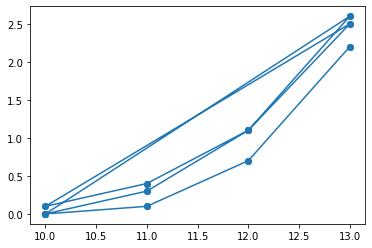

In [121]:
plt.scatter(x=adultsEntireNet['MMWR-WEEK'],y=adultsEntireNet['CUMULATIVE_RATE'])
plt.plot(adultsEntireNet['MMWR-WEEK'], adultsEntireNet['CUMULATIVE_RATE'], '-o')